In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 

# Loading the image    
img = cv2.imread(r'C:\Users\ELmoor\Desktop\C-Vision\Lab 2\example1\test.jpg')

# Converting image to grayscale
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Applying SIFT detector
sift = cv2.SIFT_create()
kp = sift.detect(gray, None)

# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(img ,
                    kp ,
                    img ,
                    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('image-with-keypoints', img)
cv2.waitKey()
cv2.destroyAllWindows()

# Example 2

In [3]:
# read the images
img1 = cv2.imread(r'C:\Users\ELmoor\Desktop\C-Vision\Lab 2\example1\book.jpg')  
img2 = cv2.imread(r'C:\Users\ELmoor\Desktop\C-Vision\Lab 2\example1\table.jpg')

# convert images to grayscale
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# create SIFT object
sift = cv2.SIFT_create()
# detect SIFT features in both images
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
np.shape(descriptors_1)


(630, 128)

In [4]:
# create feature matcher
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
# match descriptors of both images
matches = bf.match(descriptors_1,descriptors_2)

In [9]:
# sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)
# draw first 50 matches
matched_img = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:], img2, flags=2)

In [10]:
# show the image
cv2.imshow('image', matched_img)
# save the image
# cv2.imwrite("matched_images.jpg", matched_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Example 3

In [11]:
def find_closest_match(test_image_path, image_folder):
    
    # Load the test image and extract its SIFT features
    test_img = cv2.imread(test_image_path)
    test_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    test_kp, test_desc = sift.detectAndCompute(test_gray, None)

    # Convert descriptors to uint8 for bitwise operations
    test_desc = test_desc.astype(np.uint8)

    # Initialize variables for best match
    best_match_path = None
    best_match_distance = float('inf')

    # Iterate over images in the folder
    for filename in os.listdir(image_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(image_folder, filename)

            # Load the image and extract its SIFT features
            img = cv2.imread(image_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            kp, desc = sift.detectAndCompute(gray, None)

            # Convert descriptors to uint8 for bitwise operations
            desc = desc.astype(np.uint8)

            # Create a BFMatcher object
            bf = cv2.BFMatcher()

            # Perform feature matching
            matches = bf.knnMatch(test_desc, desc, k=2)

            # Apply ratio test to filter out bad matches
            good_matches = []
            for m, n in matches:
                if m.distance < 0.7 * n.distance:
                    good_matches.append(m)

            # Calculate Hamming distance using numpy
            hamming_distance = np.sum(np.bitwise_xor(test_desc[m.queryIdx], desc[m.trainIdx])) / len(good_matches)

            # Update best match if a better one is found
            if hamming_distance < best_match_distance:
                best_match_path = image_path
                best_match_distance = hamming_distance

    return best_match_path


In [20]:
# Example usage
test_image_path =r'C:\Users\ELmoor\Desktop\C-Vision\Lab 2\test1.jpg'
image_folder = r'C:\Users\ELmoor\Desktop\C-Vision\Lab 2\example2'
closest_match = find_closest_match(test_image_path, image_folder)

if closest_match:
    print("Closest match found:", closest_match)
else:
    print("No close match found.")
    
    

Closest match found: C:\Users\ELmoor\Desktop\C-Vision\Lab 2\example2\cat.13.jpg


## Example 4

In [19]:
# Path to video  
video_path=r'C:\Users\ELmoor\Desktop\C-Vision\Lab 2\example3\bird1.mp4'
video = cv2.VideoCapture(0)

# read only the first frame for drawing a rectangle for the desired object
ret,frame = video.read()

# I am giving  big random numbers for x_min and y_min because if you initialize them as zeros whatever coordinate you go minimum will be zero 
x_min,y_min,x_max,y_max=36000,36000,0,0


def coordinat_chooser(event,x,y,flags,param):
    global go , x_min , y_min, x_max , y_max

    # when you click the right button, it will provide coordinates for variables
    if event==cv2.EVENT_RBUTTONDOWN:
        
        # if current coordinate of x lower than the x_min it will be new x_min , same rules apply for y_min 
        x_min=min(x,x_min) 
        y_min=min(y,y_min)

         # if current coordinate of x higher than the x_max it will be new x_max , same rules apply for y_max
        x_max=max(x,x_max)
        y_max=max(y,y_max)

        # draw rectangle
        cv2.rectangle(frame,(x_min,y_min),(x_max,y_max),(0,255,0),1)


    """
        if you didn't like your rectangle (maybe if you made some misscliks),  reset the coordinates with the middle button of your mouse
        if you press the middle button of your mouse coordinates will reset and you can give a new 2-point pair for your rectangle
    """
    if event==cv2.EVENT_LBUTTONDOWN:
        print("reset coordinate  data")
        x_min,y_min,x_max,y_max=36000,36000,0,0

cv2.namedWindow('coordinate_screen')
# Set mouse handler for the specified window, in this case, "coordinate_screen" window
cv2.setMouseCallback('coordinate_screen',coordinat_chooser)


while True:
    cv2.imshow("coordinate_screen",frame) # show only first frame 
    
#     cv2.waitKey(0) 
#     cv2.destroyWindow('coordinate_screen')

    k = cv2.waitKey(5) & 0xFF # after drawing rectangle press ESC   
    if k == 27:
        cv2.destroyAllWindows()
        break

In [20]:
# take region of interest ( take inside of rectangle )
roi_image=frame[y_min:y_max,x_min:x_max]

# convert roi to grayscale, SIFT Algorithm works with grayscale images
roi_gray=cv2.cvtColor(roi_image,cv2.COLOR_BGR2GRAY) 

In [21]:
# create SIFT algorithm object
sift = cv2.SIFT_create()

# find roi's keypoints and descriptors
keypoints_1, descriptors_1 = sift.detectAndCompute(roi_gray, None)

roi_keypoint_image=cv2.drawKeypoints(roi_gray,keypoints_1,roi_gray)

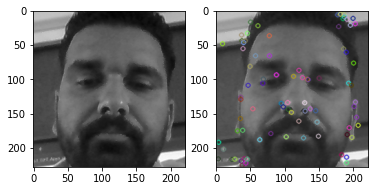

In [22]:
# visualize key points 
plt.subplot(121)
plt.imshow(roi_gray,cmap="gray")

plt.subplot(122)
plt.imshow(roi_keypoint_image,cmap="gray")

In [ ]:
# Path to the video  
video_path=r'C:\Users\ELmoor\Desktop\C-Vision\Lab 2\example3\bird1.mp4'

video = cv2.VideoCapture(0)

# matcher object
bf = cv2.BFMatcher()

while True :
    # reading video 
    ret,frame=video.read()
  
    # convert the frame to grayscale 
    frame_gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

  
    # find current frames keypoints and descriptors
    keypoints_2, descriptors_2 = sift.detectAndCompute(frame_gray, None)

  
    """
    Compare the key points/descriptors extracted from the 
    the first frame(from the target object) with those extracted from the current frame.
    """
    matches =bf.match(descriptors_1, descriptors_2)

 
    for match in matches:
        # .queryIdx and .trainIdx give index for key points

        # .queryIdx gives keypoint index from target image
        query_idx = match.queryIdx

        # .trainIdx gives keypoint index from current frame 
        train_idx = match.trainIdx

        # take coordinates that match
        pt1 = keypoints_1[query_idx].pt

        # current frame key points coordinates
        pt2 = keypoints_2[train_idx].pt

        # draw circle to pt2 coordinates , because pt2 gives current frame coordinates
        cv2.circle(frame,(int(pt2[0]),int(pt2[1])),2,(255,0,0),2)

    # show frame to screen
    cv2.imshow("coordinate_screen",frame) 
   
    k = cv2.waitKey(5) & 0xFF # after drawing rectangle press ESC   
    if k == 27:
        cv2.destroyAllWindows()
        break

cv2.destroyAllWindows()